# Improving the Basic Model: Reducing Overfitting
---

##### Targets:
  Improve the basic model by reducing overfitting. Added dropout of 0.05 to reduce overfitting.
  With the basic model, I was able to achieve 99.4% accuracy when trained for around 40 epochs. This means that the model has the capacity to reach 99.4%. So, after adding dropout, I added step LR starting at 0.1 and reducing by 0.1 at every 4 epochs. These 2 numbers were found after experimenting.

##### Results:
  - Best Train Accuracy - 98.54%
  - Best Test Accuracy - 99.38%
  - Total Parameters - 8000

##### Analysis:
Overfitting reduced and was consistently able to maintain 99.3% test accuracy. Increasing the learning rate to 0.1 helped to reach higher accuracy sooner and gradually decreasing the learning rate by 0.1 helped in achieving stable results. Giving more training sample can improve the learning of the model.

In [ ]:
!git clone https://github.com/garima-mahato/ERA_V3.git

Cloning into 'ERA_V1'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 152 (delta 68), reused 78 (delta 21), pack-reused 0
Receiving objects: 100% (152/152), 2.40 MiB | 15.08 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [ ]:
from ERA_V3.Session7 import *

In [ ]:
# # CUDA?

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

device = set_device()

CUDA Available? True


### Dataset Creation

In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 96563963.95it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 43247302.33it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26310871.08it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16710990.15it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
# set seed
torch.manual_seed(1)

batch_size = 512

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
kwargs.update({'batch_size': batch_size, 'shuffle': True})

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

Data Visualization

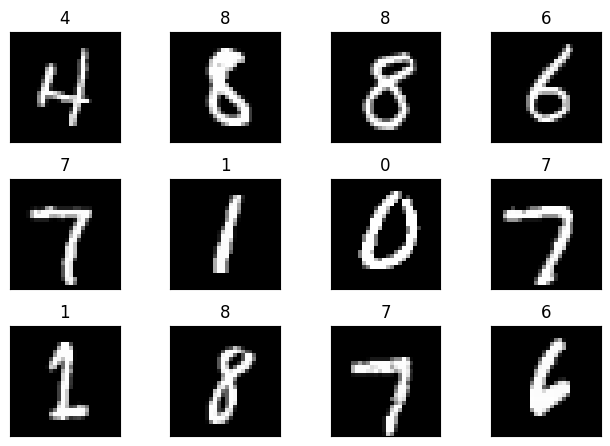

In [ ]:
view_data(train_loader)

### Model Architecture

In [ ]:
!pip install torchsummary
from torchsummary import summary

model = Model_7().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 14, 24, 24]           1,008
              ReLU-6           [-1, 14, 24, 24]               0
       BatchNorm2d-7           [-1, 14, 24, 24]              28
           Dropout-8           [-1, 14, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             140
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,260
             ReLU-12           [-1, 14, 10, 10]               0
    

### Model Training and Testing

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

dropout_value = 0.05

model = Model_7(dropout_value=dropout_value).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_acc, train_losses)
  scheduler.step()
  test(model, device, test_loader, test_acc, test_losses)


Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.1322 Batch_id=468 Accuracy=89.18: 100%|██████████| 469/469 [00:32<00:00, 14.39it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0502, Accuracy: 9838/10000 (98.38%)

Epoch 2


Train: Loss=0.1159 Batch_id=468 Accuracy=96.72: 100%|██████████| 469/469 [00:31<00:00, 14.85it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0327, Accuracy: 9890/10000 (98.90%)

Epoch 3


Train: Loss=0.0532 Batch_id=468 Accuracy=97.26: 100%|██████████| 469/469 [00:33<00:00, 14.17it/s]

Adjusting learning rate of group 0 to 1.0000e-01.


Test set: Average loss: 0.0286, Accuracy: 9917/10000 (99.17%)

Epoch 4


Train: Loss=0.0535 Batch_id=468 Accuracy=97.46: 100%|██████████| 469/469 [00:33<00:00, 13.80it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0318, Accuracy: 9899/10000 (98.99%)

Epoch 5


Train: Loss=0.1066 Batch_id=468 Accuracy=98.14: 100%|██████████| 469/469 [00:32<00:00, 14.22it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0202, Accuracy: 9933/10000 (99.33%)

Epoch 6


Train: Loss=0.0813 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:32<00:00, 14.54it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0199, Accuracy: 9935/10000 (99.35%)

Epoch 7


Train: Loss=0.0108 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:32<00:00, 14.34it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0200, Accuracy: 9934/10000 (99.34%)

Epoch 8


Train: Loss=0.0686 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:34<00:00, 13.68it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0189, Accuracy: 9937/10000 (99.37%)

Epoch 9


Train: Loss=0.0230 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:32<00:00, 14.25it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0193, Accuracy: 9936/10000 (99.36%)

Epoch 10


Train: Loss=0.0431 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:31<00:00, 14.76it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0197, Accuracy: 9932/10000 (99.32%)

Epoch 11


Train: Loss=0.0999 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:31<00:00, 14.85it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


Test set: Average loss: 0.0190, Accuracy: 9936/10000 (99.36%)

Epoch 12


Train: Loss=0.1079 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:33<00:00, 14.07it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Test set: Average loss: 0.0188, Accuracy: 9938/10000 (99.38%)

Epoch 13


Train: Loss=0.0809 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:32<00:00, 14.48it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Test set: Average loss: 0.0196, Accuracy: 9935/10000 (99.35%)

Epoch 14


Train: Loss=0.0260 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:31<00:00, 14.93it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Test set: Average loss: 0.0189, Accuracy: 9937/10000 (99.37%)

Epoch 15


Train: Loss=0.0853 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:31<00:00, 15.00it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Test set: Average loss: 0.0198, Accuracy: 9933/10000 (99.33%)

